In [1]:
#!/usr/bin/env python
# coding: utf-8

import os, sys
import logging

import numpy as np
import h5netcdf

import xarray as xr
import xarray.ufuncs as xu
import xrft
import pandas as pd

from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy

plt.rc("figure", figsize=(12,10))
plt.rc("font", size=14)

from dask.distributed import Client, LocalCluster
#
# Initialisation d'un cluster de 32 coeurs
cluster = LocalCluster(processes=False, n_workers=1, threads_per_worker=4, silence_logs='error')
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://137.129.155.67:8787/status,
Dashboard: http://137.129.155.67:8787/status,Workers: 1
Total threads: 4,Total memory: 78.61 GiB
Status: running,Using processes: False
Comm: inproc://137.129.155.67/18115/1,Workers: 1
Dashboard: http://137.129.155.67:8787/status,Total threads: 4
Started: Just now,Total memory: 78.61 GiB
Comm: inproc://137.129.155.67/18115/4,Total threads: 4
Dashboard: http://137.129.155.67:45009/status,Memory: 78.61 GiB
Nanny: None,


In [2]:
path = "/home/durand/Documents/OLR/"

indir_data = path + 'Anomaly/'
outdir_TF = path + 'TF2D/'

indir_data_RAW = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/RAW_ANOMALY/OLR/'
indir_data_FILTERED = '/cnrm/tropics/commun/DATACOMMUN/WAVE/NO_SAVE/DATA/FILTERED_ANOMALY/OLR/'

var_file = 'anom_OLR_brut_ERA5_3H'


In [4]:
year = 2009
latitude = -10.5
longitude = 105.5

ds_RAW = xr.open_mfdataset(indir_data_RAW+'*'+var_file+'*'+str(year)+'.nc', chunks = {'time' : 1}, parallel=True)
ds_FILTER = xr.open_mfdataset(indir_data_FILTERED + '*' + str(year) + '.nc', chunks = {'time' : 1}, parallel=True)

ds_ERWAN = xr.open_mfdataset('/cnrm/tropics/user/peyrille/Stage_PFE_Erwan/data/OLR/'+'*'+str(year)+'.nc', chunks = {'time' : 1}, parallel=True)

In [14]:
_hov = ds_FILTER.sel(lat = slice(-5,5)).sel(lon = 10, method = 'nearest')
_hov_E = ds_ERWAN.sel(lat = slice(-5,5)).sel(lon = 10, method = 'nearest')

<xarray.Dataset>
Dimensions:     (time: 2920, lat: 10)
Coordinates:
  * time        (time) datetime64[ns] 2009-01-01 ... 2009-12-31T21:00:00
  * lat         (lat) float32 -4.5 -3.5 -2.5 -1.5 -0.5 0.5 1.5 2.5 3.5 4.5
    lon         float64 10.0
Data variables:
    OLR_Kelvin  (time, lat) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    OLR_Rossby  (time, lat) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    OLR_MJO     (time, lat) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    OLR_MRG     (time, lat) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    OLR_EIG     (time, lat) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    OLR_WIG     (time, lat) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    OLR_TD      (time, lat) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    OLR_LF      (time, lat) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>

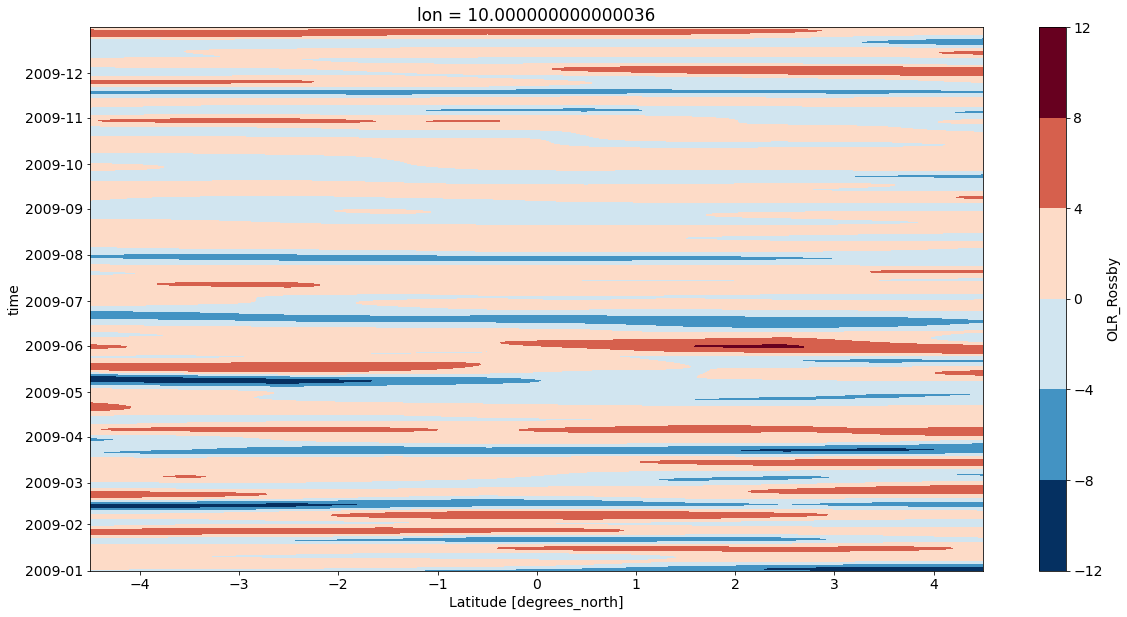

In [16]:
plt.rc("figure", figsize=(20,10))

_hov['OLR_Rossby'].plot.contourf()